# <div style="text-align: center;">Problem Statement</div>
---
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

- They want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
    - Which variables are significant in predicting the demand for shared bikes.
    - How well those variables describe the bike demands

# <div style="text-align: center;">Business Goal</div>
---
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

# <div style="text-align: center;">1. Import Required Libraries:</div>
---

In [1]:
# import math and analysis tools
import numpy as np
import pandas as pd

# Import visualization tools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import warnings
import warnings
warnings.filterwarnings('ignore')

# import ML liberaries
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

# <div style="text-align: center;">2. Read and Understand Data:</div>
---

In [2]:
# Read the dataset
pd.set_option('display.max_rows', None)
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Convert dteday to datetime datatype
bike['dteday'] = pd.to_datetime(bike['dteday'])

In [4]:
# Check for the info
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [5]:
# As per the above information there is no null values in the dataset and the datatype is also correct
# But lets just cross check for the null values in data
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# Do the discriptive analysis of the numerical column
bike[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# In cnt column there is on row which has the value of 22 I am going to remove that value from the row
# Because 22 bookings looks suspicious
bike = bike[bike['cnt']>400]

# <div style="text-align: center;">3. Feature Engineering and EDA:</div>
---
1. Univariate/Bivariate Analysis
2. Multivariate Analysis

### 1. Univariate/Bivariate Analysis:-

In [8]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
# Remove column instant from the dataset
bike.drop(columns='instant', inplace=True)

**DateTime Column analysis:**

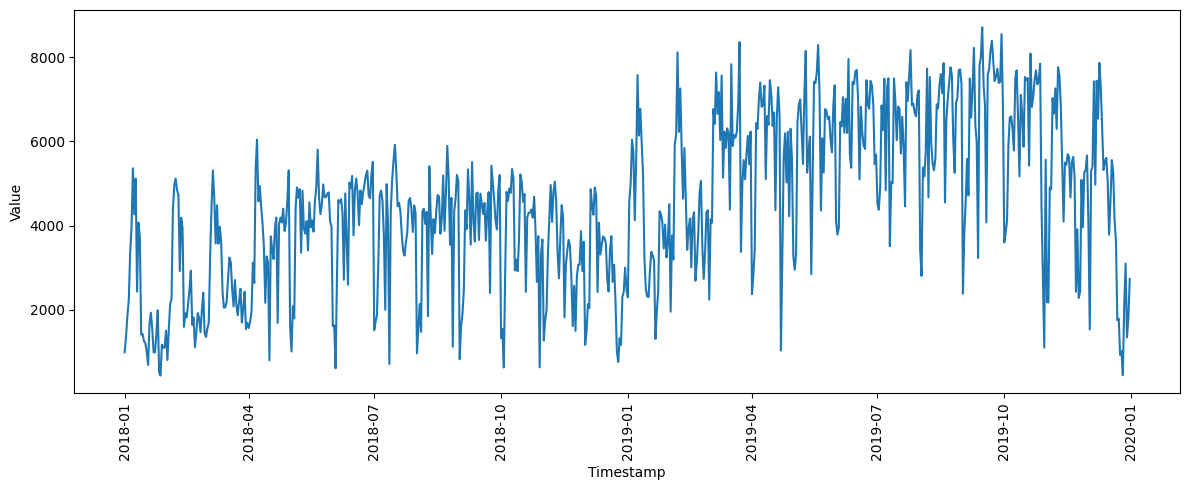

In [10]:
# Plot Day wise line plot to check the trend
plt.figure(figsize=(12, 5))
sns.lineplot(data=bike, x='dteday', y='cnt')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Observation:**
- According to the above graph it is quite difficult to get to any conclusion. We can see that we have an upward and downward trend in month wise spread of the data.
- Lets just see the month wise trend.

In [11]:
# Create a new column which will represent the year_month
bike['year_month'] = bike['dteday'].dt.to_period('M').astype(str)

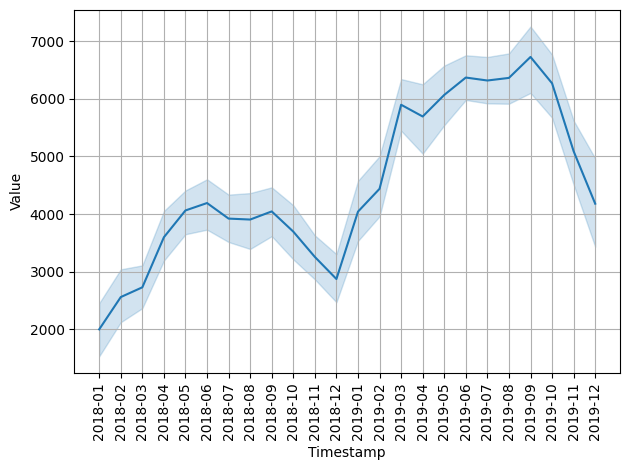

In [12]:
# Check for the month wise trend
sns.lineplot(data=bike, x='year_month', y='cnt')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
# Drop the Year_month column and date column as it contains all unique dates
bike.drop(columns=['year_month', 'dteday'], inplace=True)

**Observation:**
- As from the above observation it is clearly visible that from 09-2018 company has seen steap decline in the demand but from 12-2018 company has seen exponential growth in the demand till 09-2019 and after that again demand is declined due to covid which is quite obvious.

**Categorical Column Analysis:**

In [14]:
# First Assign Names to the Categorical Column
# Create Lables which we can use to give to the categorical datas:
season_labels = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
yr_labels = {0:'2018', 1:'2019'}
mnth_labels = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August',
              9: 'September', 10: 'October', 11: 'November', 12: 'December'}
holiday_labels = {0:'No-Holiday', 1:'Holiday'}
weekday_labels = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
workingday_labels = {0:'Free Day', 1:'Working Day'}
weathersit_labels = {1:'Clear to Cloudy', 2:'Misty with Clouds', 3:'Light Precipitation',
                     4:'Severe Weather'}

# Create a list of all lables dictionaries in the same order or columns present in dataset
labels_list = [season_labels, yr_labels, mnth_labels, holiday_labels, weekday_labels, workingday_labels, weathersit_labels]

# Assign Column Names:
columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for i in range(len(columns)):
    col = columns[i]
    label = labels_list[i]
    
    # Update the rows
    bike[col] = bike[col].map(label)

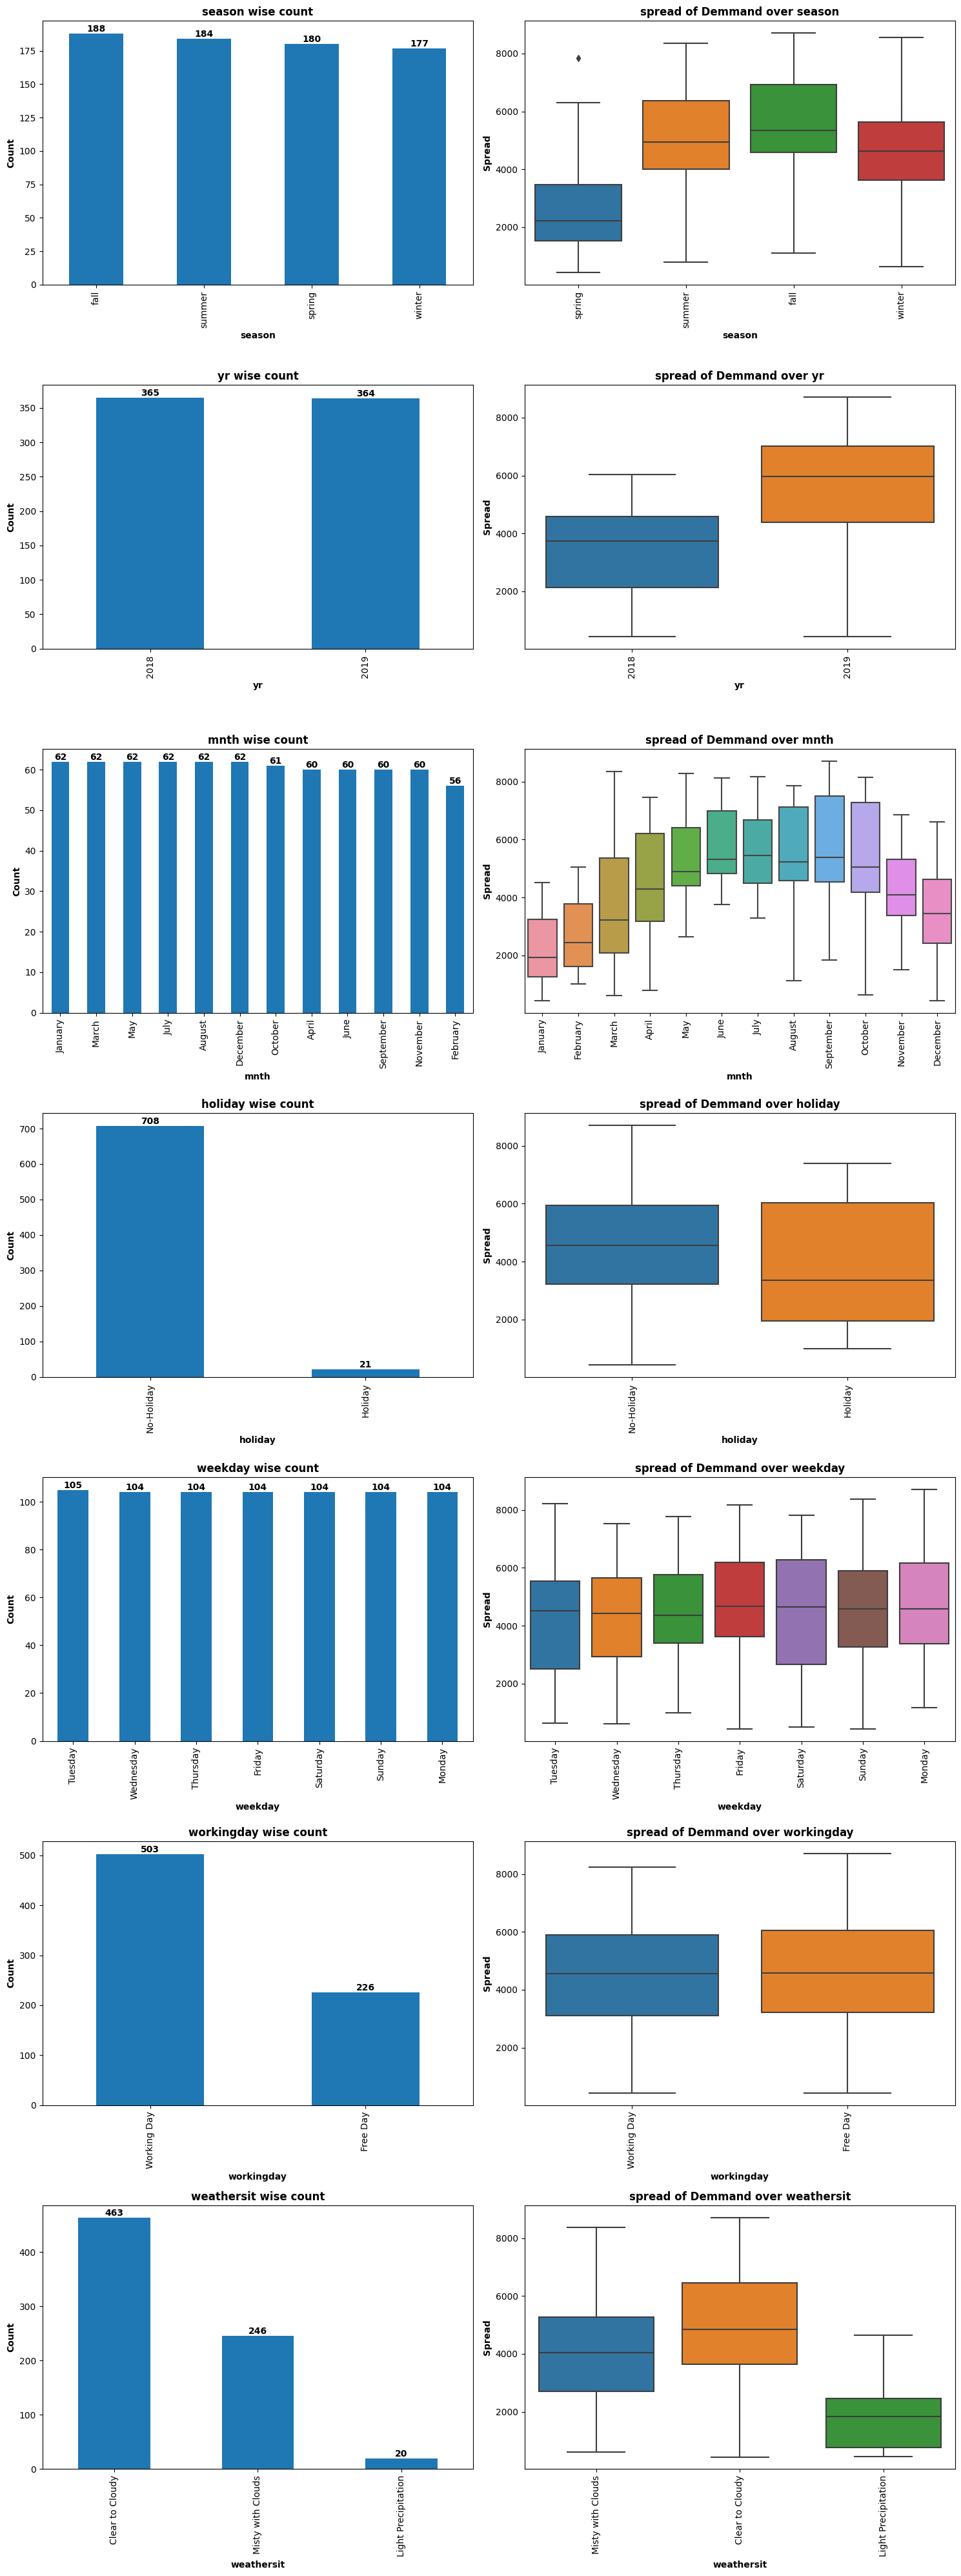

In [15]:
# Lests check for Individual column categories count and their spread of demand

# Plot subplots: 
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 40))

# Plot the graphs
# Bar Plot
for idx, col in enumerate(columns):
    ax = axes[idx, 0]
    
    count = bike[col].value_counts()
    count.plot.bar(ax=ax)
    ax.set_title(f"{col} wise count", fontweight='bold')
    ax.set_xlabel(f"{col}", fontweight='bold')
    ax.set_ylabel('Count', fontweight='bold')
    
    # Show Labels on Bars
    for i, j in enumerate(count):
        ax.text(x=i, y=j, s=j, fontweight='bold', ha='center', va='bottom')
        
# Box Plot spread of demand
for idx, col in enumerate(columns):
    ax = axes[idx, 1]

    # Box Plot spread demand
    sns.boxplot(data=bike, x=col, y='cnt', ax=ax)
    ax.set_title(f"spread of Demmand over {col}", fontweight='bold')
    ax.set_xlabel(f"{col}", fontweight='bold')
    ax.set_ylabel('Spread', fontweight='bold')
    # Change the Xticks labels
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

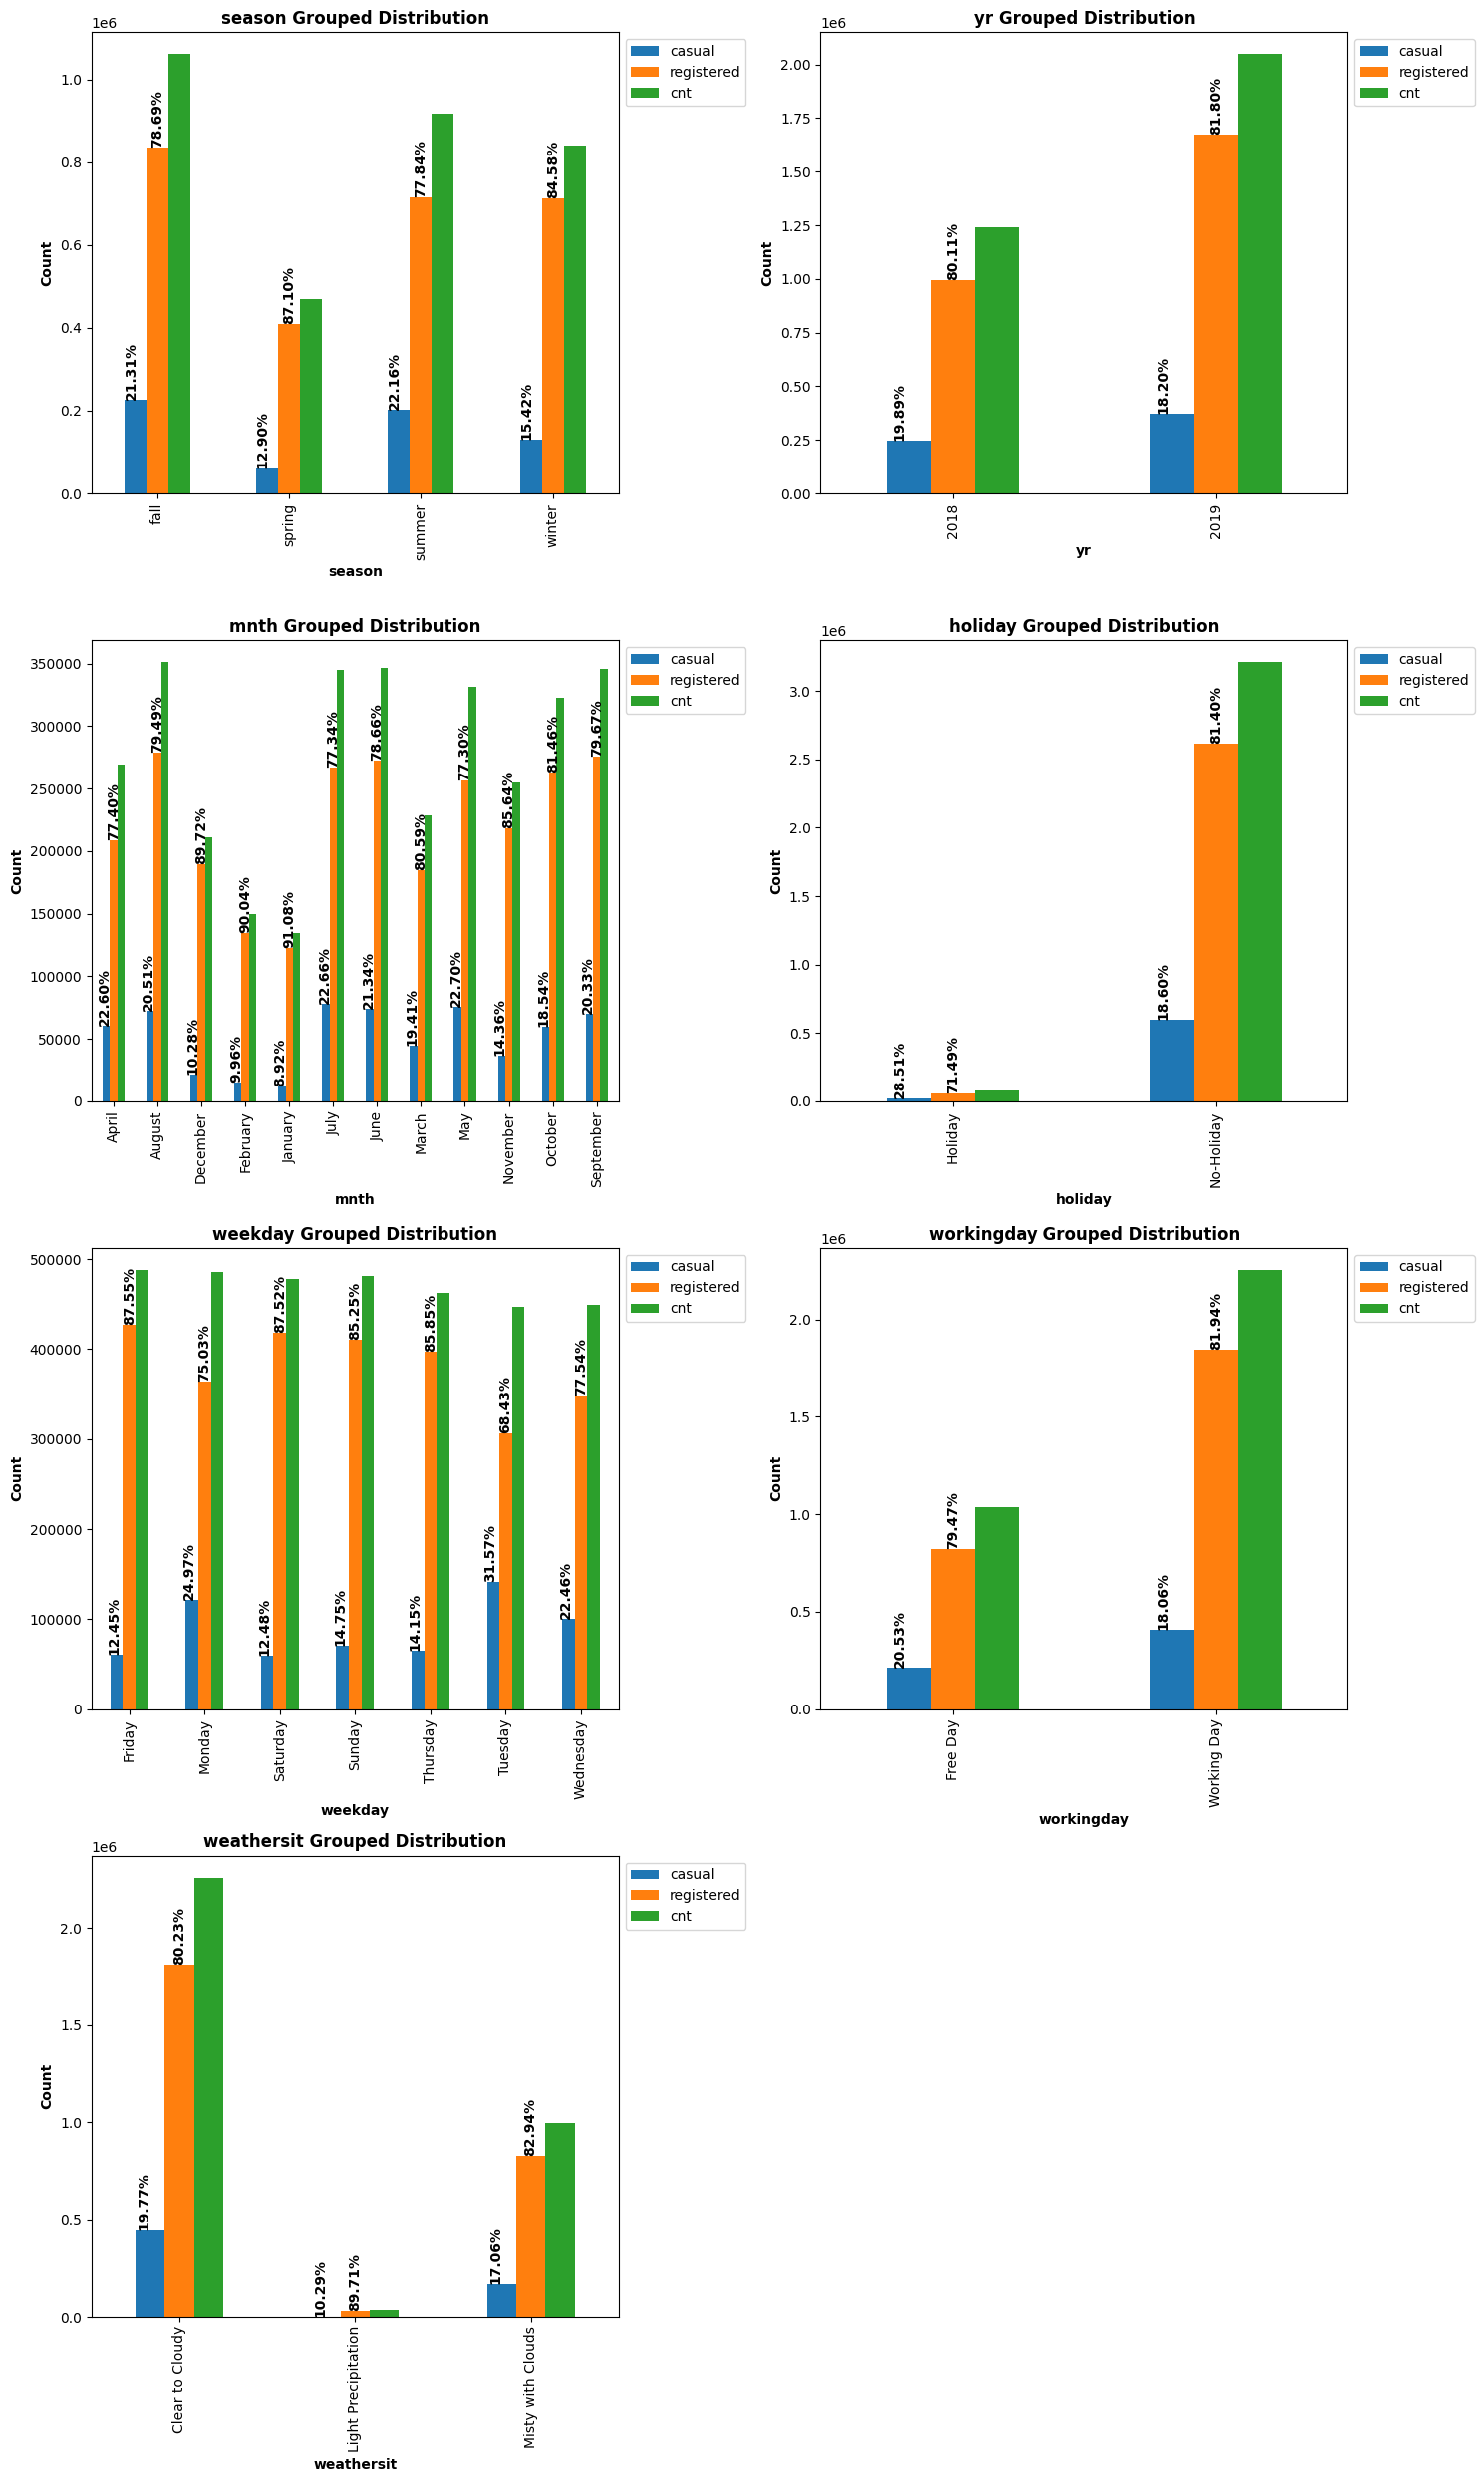

In [16]:
# Lets Check for the distribution of Casual and registered wrt Total Count

# Plot Subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 25))
for idx, cols in enumerate(columns):
    row_idx, col_idx = divmod(idx, 2)
    ax = axes[row_idx, col_idx]
    
    grouped_data = bike.groupby(cols)['casual', 'registered', 'cnt'].sum()
    grouped_data.plot.bar(ax=ax)
    ax.set_title(f"{cols} Grouped Distribution", fontweight='bold')
    ax.set_xlabel(f"{cols}", fontweight='bold')
    ax.set_ylabel("Count", fontweight='bold')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
     # Add percentage on each bar
    total_height = grouped_data['cnt'].sum()
    for i, (casual, registered, cnt) in enumerate(zip(grouped_data['casual'], grouped_data['registered'], grouped_data['cnt'])):
        casual_percent = (casual / cnt) * 100
        registered_percent = (registered / cnt) * 100
        ax.text(i-0.2, casual, f'{casual_percent:.2f}%', ha='center', va='bottom', fontweight='bold', rotation=90)
        ax.text(i, registered, f'{registered_percent:.2f}%', ha='center', va='bottom', fontweight='bold', rotation=90)
        
# Remove blank subplot
if len(columns) % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()

**Observation:**
- As per the above observations there are no issue in the spread of the data according to the demand.
- In Fall season and in Clear to Cloudy weather demand of the shared bike is more.
- In working days demand of the shared bike is more.
- In free days and the holidays demand of the bike is less.

**Numerical Column Analysis:**

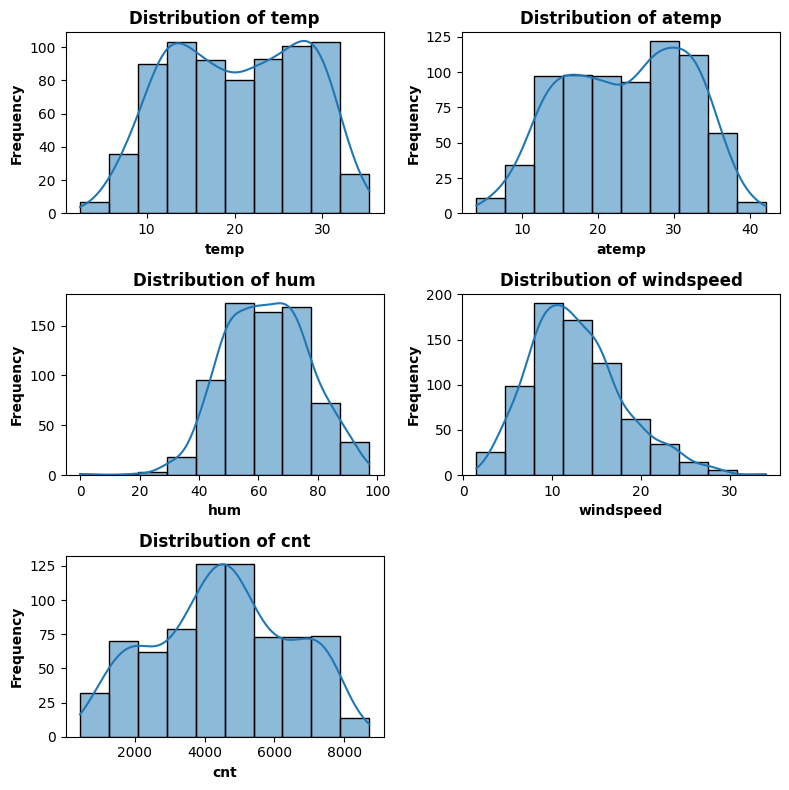

In [17]:
# Analysis of the Numerical columns:
columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 8))

for idx, cols in enumerate(columns):
    row_idx, col_idx = divmod(idx, 2)
    ax = axes[row_idx, col_idx]
    
    sns.histplot(data=bike, x=cols, bins=10, kde=True, ax=ax)
    ax.set_title(f'Distribution of {cols}', fontweight='bold')
    ax.set_xlabel(cols, fontweight='bold')
    ax.set_ylabel('Frequency', fontweight='bold')
    
if len(columns) % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()

- Windspeed, Humidity and cnt is Normally distributed.
- But the Temperature and Feels like Temperature have two peaks which is also correct because temperature in different seasons can vary.

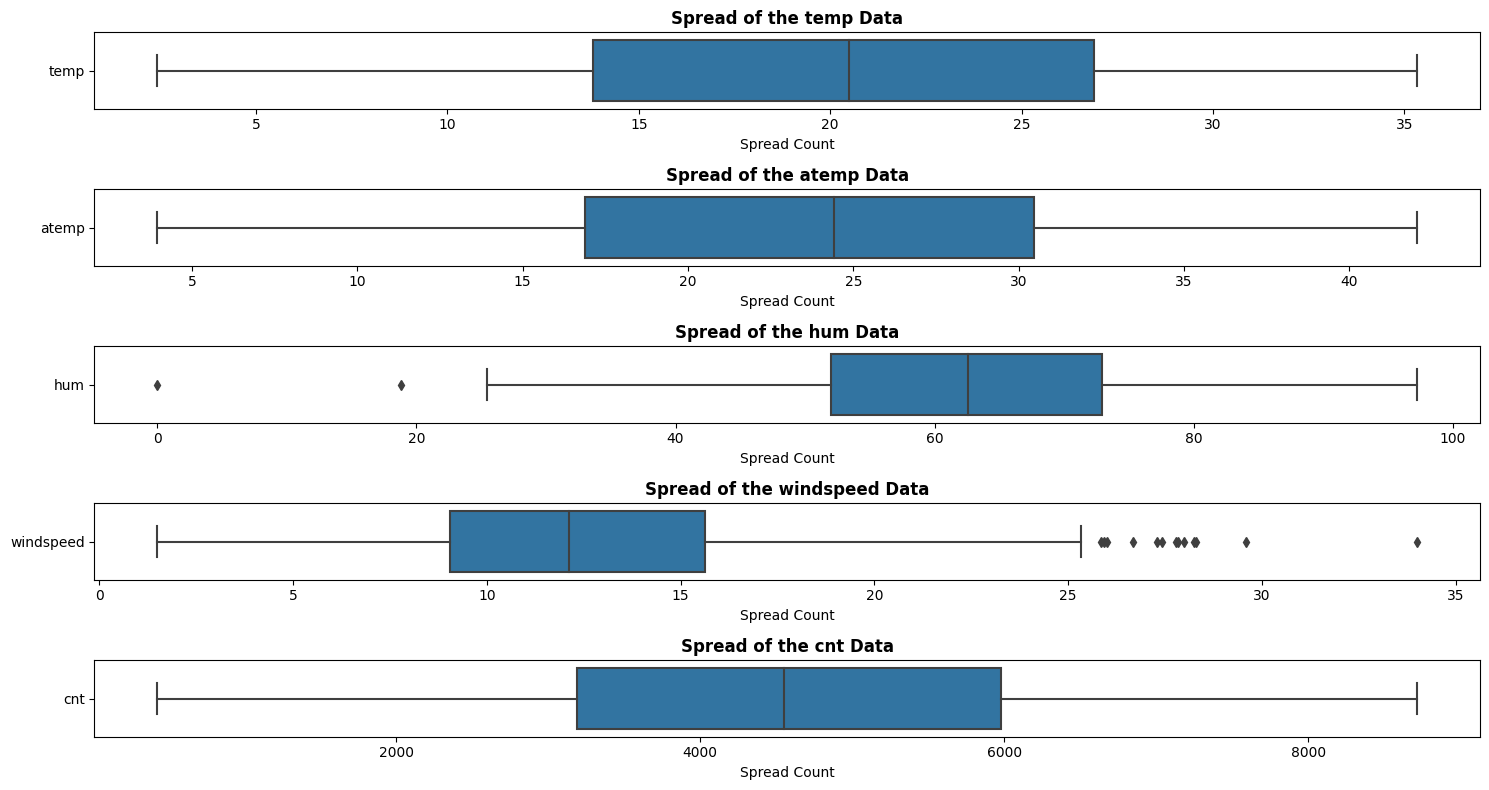

In [18]:
# Lets check for the outliers in these columns:
columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15, 8))

for idx, cols in enumerate(columns):    
    sns.boxplot(data=bike, x=cols, ax=axes[idx])
    axes[idx].set_title(f"Spread of the {cols} Data", fontweight='bold')
    axes[idx].set_xlabel('Spread Count')
    axes[idx].set_yticklabels([cols])
    
plt.tight_layout()
plt.show()

- There are few outliers in the windspeed column and humidity column.
- Lets Analyse and fix those, in fixing I am not going to remove any rows I am gooing to use Capping technique to fix the outlier.

In [19]:
# Fix Humidity data using Lower Boundary of the boxplot
q1 = np.percentile(bike.hum, 25)
q3 = np.percentile(bike.hum, 75)
iqr = q3-q1
lower_bound = q1-1.5*iqr
bike['hum'] = bike['hum'].apply(lambda x: lower_bound if x<lower_bound else x)

In [20]:
# Fix the Windspeed using Upper Limit
q1 = np.percentile(bike.windspeed, 25)
q3 = np.percentile(bike.windspeed, 75)
iqr = q3-q1
upper_bound = q3+1.5*iqr
bike['windspeed'] = bike['windspeed'].apply(lambda x: upper_bound if x>upper_bound else x)

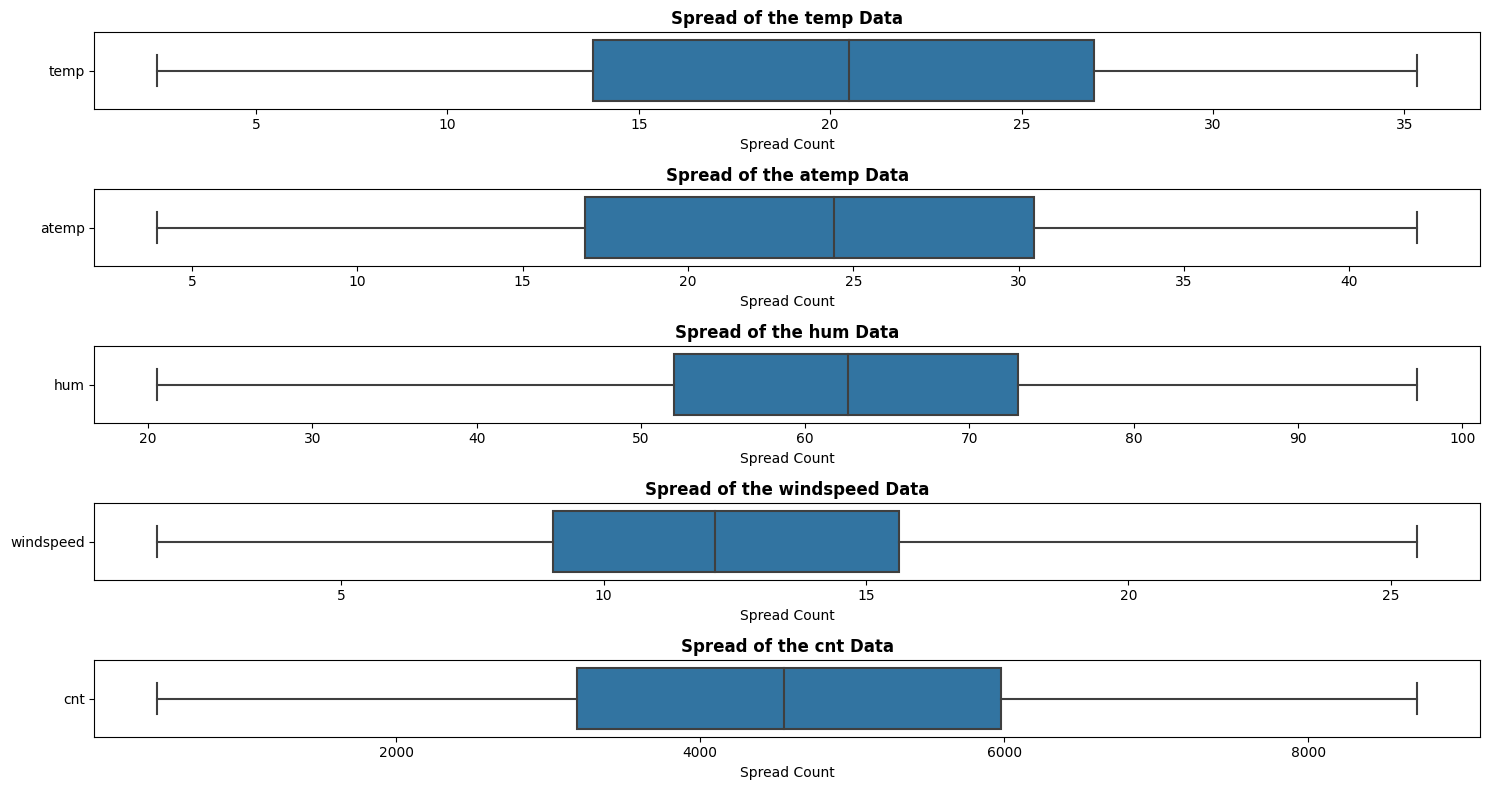

In [21]:
# Lets check for the outliers in these columns:
columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15, 8))

for idx, cols in enumerate(columns):    
    sns.boxplot(data=bike, x=cols, ax=axes[idx])
    axes[idx].set_title(f"Spread of the {cols} Data", fontweight='bold')
    axes[idx].set_xlabel('Spread Count')
    axes[idx].set_yticklabels([cols])
    
plt.tight_layout()
plt.show()

- Now all the numerical column data spread is corrected.
- Lets Just check for the multicollinearity in the columns.

In [22]:
# Now all the analysis is done then just remove Casual and registered column form our dataset
bike.drop(columns=['casual', 'registered'], inplace=True)

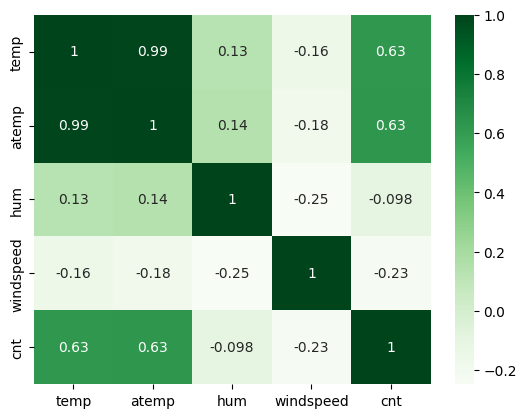

In [23]:
# Check for the corelation in b/w numerical columns
corr = bike[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
sns.heatmap(corr, cmap='Greens', annot=True)
plt.show()

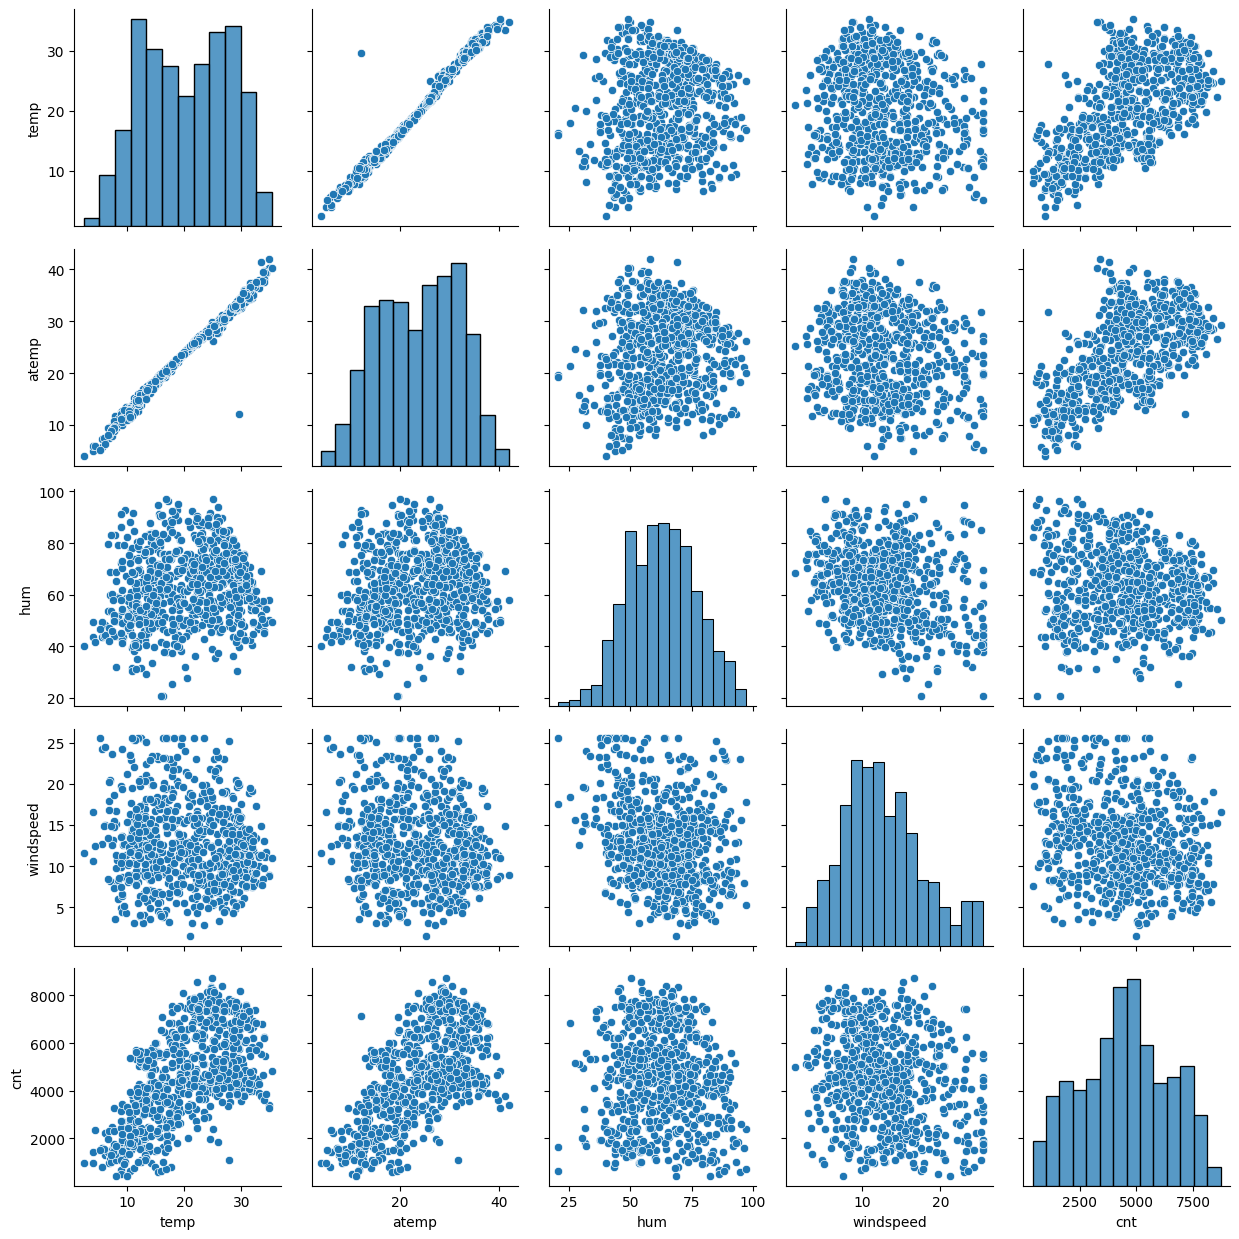

In [24]:
# Plot the pair plot for all the columns
sns.pairplot(data=bike[['temp', 'atemp', 'hum', 'windspeed','cnt']])
plt.tight_layout()
plt.show()

In [25]:
# Remove atemp column other wise it will create Multicollinearity in our regression model
bike.drop(columns='atemp', inplace=True)

# <div style="text-align: center;">4. Data Preperation for Model Training</div>
---
1. Column Encoding
2. Column Scaling
3. Train_Test_Split

In [26]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,January,No-Holiday,Tuesday,Working Day,Misty with Clouds,14.110847,80.5833,10.749882,985
1,spring,2018,January,No-Holiday,Wednesday,Working Day,Misty with Clouds,14.902598,69.6087,16.652113,801
2,spring,2018,January,No-Holiday,Thursday,Working Day,Clear to Cloudy,8.050924,43.7273,16.636703,1349
3,spring,2018,January,No-Holiday,Friday,Working Day,Clear to Cloudy,8.200000,59.0435,10.739832,1562
4,spring,2018,January,No-Holiday,Saturday,Working Day,Clear to Cloudy,9.305237,43.6957,12.522300,1600


**Data Encoding**

In [27]:
# Fix the columns yr, holiday, workingday
bike.yr = bike.yr.apply(lambda x: 0 if x=='2018' else 1)
bike.holiday = bike.holiday.apply(lambda x: 0 if x=='No-Holiday' else 1)
bike.workingday = bike.workingday.apply(lambda x: 0 if x=='Free Day' else 1)

In [28]:
cat_var = ['season', 'mnth', 'weekday', 'weathersit']
bike_encoded = pd.get_dummies(bike, columns=cat_var, drop_first=True)

In [29]:
bike_encoded.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Precipitation,weathersit_Misty with Clouds
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,1,0,0,0,0,0,0


**Train Test Split**

In [30]:
# Divide the data into two parts dependent and independent columns
y = bike_encoded.pop('cnt')
X = bike_encoded

In [31]:
# Train test split
# keeping random_state=42 because it is giving better model metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
# Check for the shape of the data
print('Shape of X_train', X_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of y_train', y_train.shape)
print('Shape of y_test', y_test.shape)

Shape of X_train (510, 28)
Shape of X_test (219, 28)
Shape of y_train (510,)
Shape of y_test (219,)


**Data Scaling**

In [33]:
num_var = ['temp', 'hum', 'windspeed']
scaler = StandardScaler() # I am using standard scaler for scaling the data because it is giving us low VIF
X_train[num_var] = scaler.fit_transform(X_train[num_var])

In [34]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_August,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Precipitation,weathersit_Misty with Clouds
683,1,0,1,-0.983463,-0.105929,-0.470468,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
644,1,0,1,-0.467251,0.533309,-0.633284,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1
163,0,0,1,0.734208,-1.020870,1.627398,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
360,0,0,1,-0.965192,0.927158,0.017818,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
639,1,0,1,0.492088,1.720913,-1.138423,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0


# <div style="text-align: center;">5. Model Training</div>
---
1. Removing non required Columns using RFE and P_values analysis.
2. Analyse the Models using statsmodel summary.
3. Build Final Model using Scikit Learn LinearRegression while keeping required columns.

## Training Temporary Models:
- Train Model with all the parameters and then use RFE to remove non required columns and then analyze using statsmodel and VIF

In [35]:
# train LinearRegression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [36]:
# Train Model on rfe
rfe = RFE(lr, n_features_to_select=18)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=18)

In [37]:
# Check for the columns which needs to be removed
X_train.columns[~rfe.support_]

Index(['workingday', 'windspeed', 'season_summer', 'mnth_August',
       'mnth_February', 'mnth_January', 'mnth_June', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday'],
      dtype='object')

In [38]:
# Columns which we are using
columns_to_use = X_train.columns[rfe.support_]
columns_to_use

Index(['yr', 'holiday', 'temp', 'hum', 'season_spring', 'season_winter',
       'mnth_December', 'mnth_July', 'mnth_March', 'mnth_May', 'mnth_November',
       'mnth_October', 'mnth_September', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weathersit_Light Precipitation',
       'weathersit_Misty with Clouds'],
      dtype='object')

In [39]:
# Update Train dataset
X_train = X_train[columns_to_use]

In [40]:
# train temporary model and check for the p_values less than 0.05 if not then remove those columns one by one
# Temp_model :- 1
X_train_lm1 = sm.add_constant(X_train)
lm1 = sm.OLS(y_train, X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     143.6
Date:                Fri, 29 Mar 2024   Prob (F-statistic):          2.06e-182
Time:                        19:58:58   Log-Likelihood:                -4117.6
No. Observations:                 510   AIC:                             8273.
Df Residuals:                     491   BIC:                             8354.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [41]:
# Temp_model :- 2
# Remove mnth_October column
X_train.pop('mnth_October')
X_train_lm2 = sm.add_constant(X_train)
lm2 = sm.OLS(y_train, X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     151.7
Date:                Fri, 29 Mar 2024   Prob (F-statistic):          4.02e-183
Time:                        19:58:58   Log-Likelihood:                -4118.5
No. Observations:                 510   AIC:                             8273.
Df Residuals:                     492   BIC:                             8349.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [42]:
# Temp_model :- 3
# Remove weekday_Thursday column
X_train.pop('weekday_Thursday')
X_train_lm3 = sm.add_constant(X_train)
lm3 = sm.OLS(y_train, X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     160.3
Date:                Fri, 29 Mar 2024   Prob (F-statistic):          1.58e-183
Time:                        19:58:58   Log-Likelihood:                -4120.2
No. Observations:                 510   AIC:                             8274.
Df Residuals:                     493   BIC:                             8346.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [43]:
# Temp_model :- 4
# Remove weekday_Thursday column
X_train.pop('weekday_Wednesday')
X_train_lm4 = sm.add_constant(X_train)
lm4 = sm.OLS(y_train, X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     169.8
Date:                Fri, 29 Mar 2024   Prob (F-statistic):          7.51e-184
Time:                        19:58:58   Log-Likelihood:                -4122.1
No. Observations:                 510   AIC:                             8276.
Df Residuals:                     494   BIC:                             8344.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

### Check for the VIF Value:
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [44]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,temp,2.88
4,season_spring,2.54
5,season_winter,2.40
0,yr,1.95
14,weathersit_Misty with Clouds,1.94
10,mnth_November,1.86
3,hum,1.64
7,mnth_July,1.52
6,mnth_December,1.38
11,mnth_September,1.23


- Now all the P_values are in correct range which is less than 0.05.
- And all the Vif are in correct range which is less than 5.
- Now train the Final Model

## Final Model: - Using Scikit Learn LinearRegression

In [45]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

# <div style="text-align:center;">6. Residual Analysis on Train Data:</div>
---

In [46]:
# do the prediction on training dataset
lr_pred_train = lr.predict(X_train)

# Calculate the Metrices for the analysis
print('MAE:-', round(mean_absolute_error(y_train, lr_pred_train), 3))
mse = round(mean_squared_error(y_train, lr_pred_train), 3)
print('MSE:-', mse)
print('RMSE:-', round(np.sqrt(mse), 3))
r2 = round(r2_score(y_train, lr_pred_train), 3)
print('R2 Score:-', r2)
r2_adjusted = round(1 - ((1-r2)*(X_train.shape[0]-1)/(X_train.shape[0]-1-X_train.shape[1])), 3)
print('R2 adjusted:-', r2_adjusted)

MAE:- 584.23
MSE:- 613680.806
RMSE:- 783.378
R2 Score:- 0.838
R2 adjusted:- 0.833


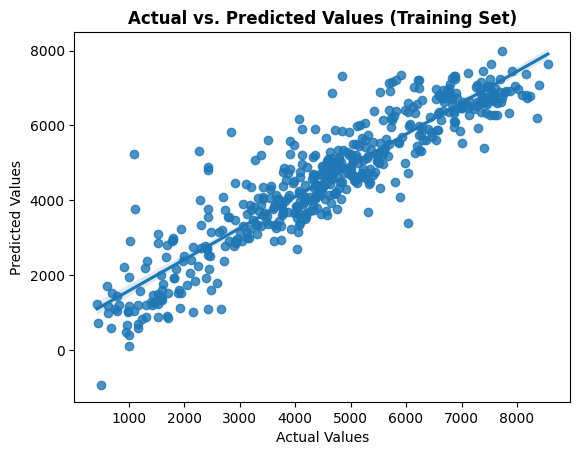

In [47]:
# Plot Scatter plot in between y_train and y_pred
sns.regplot(x=y_train, y=lr_pred_train)
plt.title('Actual vs. Predicted Values (Training Set)', fontweight='bold')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

<IPython.core.display.Javascript object>

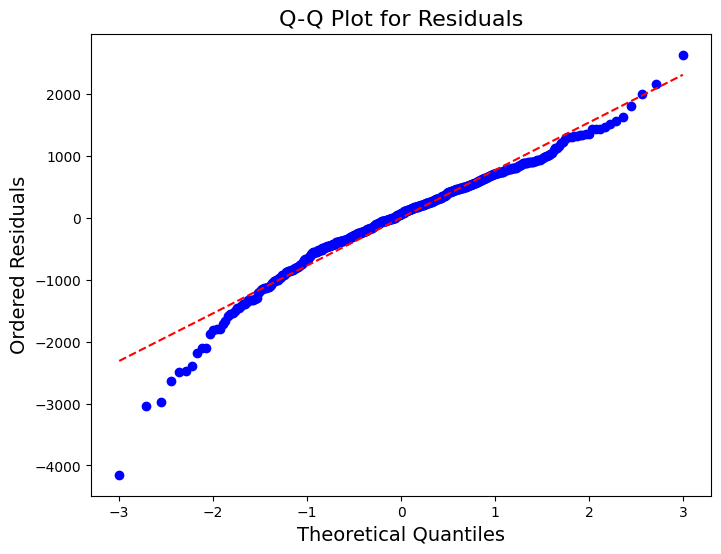

In [57]:
# Calculate residuals
residuals = y_train - lr_pred_train

# Generate Q-Q plot
fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=ax)
ax.get_lines()[1].set_linestyle('--')  # Add a dashed line for reference
ax.set_title('Q-Q Plot for Residuals', fontsize=16)
ax.set_xlabel('Theoretical Quantiles', fontsize=14)
ax.set_ylabel('Ordered Residuals', fontsize=14)
plt.show()

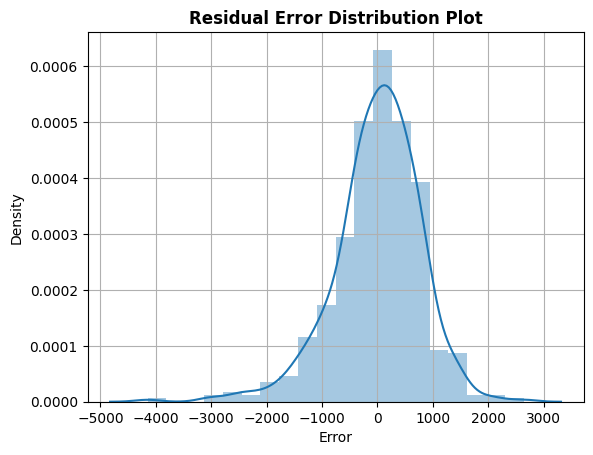

In [48]:
# Plot the distribution plot for residual error
# Residual_error = Actual-Predicted
sns.distplot((y_train-lr_pred_train), bins=20)
plt.title('Residual Error Distribution Plot', fontweight='bold')
plt.xlabel('Error')
plt.grid(True)
plt.show()

# <div style="text-align:center;">7. Making Prediction using Final Model:</div>
---

In [49]:
# Scale the columns:
num_var = ['temp', 'hum', 'windspeed']
X_test[num_var] = scaler.transform(X_test[num_var])

# Use only required columns which is used in Train dataset:
X_test = X_test[X_train.columns]

# Make Predictions:
lr_pred_test = lr.predict(X_test)

# <div style="text-align:center;">8. Model Evaluation</div>
---

In [50]:
# Calculate the Metrices for the analysis
print('MAE:-', round(mean_absolute_error(y_test, lr_pred_test), 3))
mse = round(mean_squared_error(y_test, lr_pred_test), 3)
print('MSE:-', mse)
print('RMSE:-', round(np.sqrt(mse), 3))
r2 = round(r2_score(y_test, lr_pred_test), 3)
print('R2 Score:-', r2)
r2_adjusted = round(1 - ((1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-1-X_test.shape[1])), 3)
print('R2 adjusted:-', r2_adjusted)

MAE:- 609.213
MSE:- 620116.534
RMSE:- 787.475
R2 Score:- 0.826
R2 adjusted:- 0.813


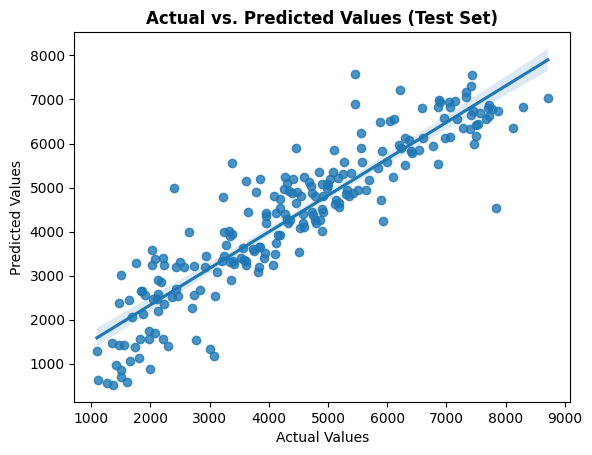

In [62]:
# Plot Scatter plot in between y_train and y_pred
sns.regplot(x=y_test, y=lr_pred_test)
plt.title('Actual vs. Predicted Values (Test Set)', fontweight='bold')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

<IPython.core.display.Javascript object>

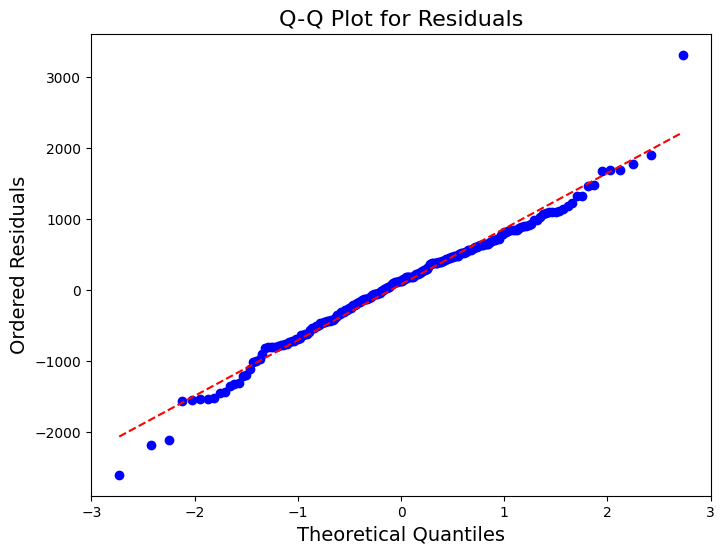

In [63]:
# Calculate residuals
residuals = y_test - lr_pred_test

# Generate Q-Q plot
fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=ax)
ax.get_lines()[1].set_linestyle('--')  # Add a dashed line for reference
ax.set_title('Q-Q Plot for Residuals', fontsize=16)
ax.set_xlabel('Theoretical Quantiles', fontsize=14)
ax.set_ylabel('Ordered Residuals', fontsize=14)
plt.show()

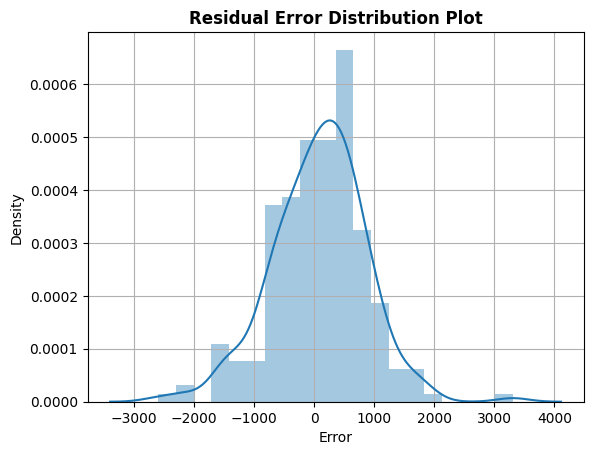

In [64]:
# Plot the distribution plot for residual error
# Residual_error = Actual-Predicted
sns.distplot((y_test-lr_pred_test), bins=20)
plt.title('Residual Error Distribution Plot', fontweight='bold')
plt.xlabel('Error')
plt.grid(True)
plt.show()

# <div style="text-align:center;">9. Submission Points:</div>
---

### Calculation of Best Fit Line:

In [65]:
# Make a dataframe which contains features and its coefficient
# Print Intercept
print('Intercept =', lr.intercept_)
coef = pd.DataFrame()
coef['Features'] = X_train.columns
coef['coefficient'] = lr.coef_
coef['coefficient'] = round(coef['coefficient'], 2)
coef = coef.sort_values(by='coefficient', ascending=False)
coef

Intercept = 3896.1291931141286


,Features,coefficient
0,yr,1981.98
5,season_winter,957.92
2,temp,846.60
11,mnth_September,523.16
8,mnth_March,465.41
9,mnth_May,314.12
3,hum,-135.49
12,weekday_Tuesday,-205.94
7,mnth_July,-361.41
6,mnth_December,-487.06


**Best fit line can be calculated using the formula given below:**

*cnt = 3896.13 + (yr * 1981.98) + (holiday * -619.67) + (temp * 846.60) + (hum * -135.49) + (season_spring * -1203.63) + (season_winter * 957.92) + (mnth_December * -487.06) + (mnth_July * -361.41) + (mnth_March * 465.41) + (mnth_May * 314.12) + (mnth_November * -708.80) + (mnth_September * 523.16) + (weekday_Tuesday * -205.94) + (weathersit_Light Precipitation * -2082.39) + (weathersit_Misty with Clouds * -552.85)

### Comparision Between Training and Test Datasets:
**On Training Dataset:**
- Train Dataset MAE:- 581.591
- Train Dataset MSE:- 609090.271
- Train Dataset RMSE:- 780.442
- Train Dataset R2 Score:- 0.839
- Train Dataset R2 adjusted:- 0.834
______________________________________
**On Test Dataset:**
- Test Dataset MAE:- 609.213
- Test Dataset MSE:- 620116.534
- Test Dataset RMSE:- 787.475
- Test Dataset R2 Score:- 0.826
- Test Dataset R2 adjusted:- 0.813

In [66]:
X_train.columns

Index(['yr', 'holiday', 'temp', 'hum', 'season_spring', 'season_winter',
       'mnth_December', 'mnth_July', 'mnth_March', 'mnth_May', 'mnth_November',
       'mnth_September', 'weekday_Tuesday', 'weathersit_Light Precipitation',
       'weathersit_Misty with Clouds'],
      dtype='object')

### Conclusion: - 
**Ques:- Which variables are significant in predicting the demand for shared bikes?**
- yr
- holiday
- temp
- hum
- season_spring
- season_winter
- mnth_December
- mnth_July
- mnth_March
- mnth_May
- mnth_November
- mnth_September
- weekday_Tuesday
- weathersit_Light Precipitation
- weathersit_Misty with Clouds